# Data Exploration Analysis 

This Jupyter notebook selects the TOP 9 MedCodes used in the ARIMA, RNN, and PID models. 

In [1]:
#Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import seaborn as sns

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Loading Data

In [2]:
# Read CSVs
PatientConsumption = pd.read_csv('PatientConsumption 2018-2019.csv').drop_duplicates()
PurchasedOrders    = pd.read_csv('PurchasedOrders 2018-2019.csv').drop_duplicates()
IncompleteOrders   = pd.read_csv('IncompleteOrders 2018-2019.csv').drop_duplicates()
PatentDrugs        = pd.read_csv('Diccionario_v3.csv').drop_duplicates()

# Retrieve date columns and apply to_datetime, set amount columns as numeric
date_columns   = [column for column in PatientConsumption.columns if 'Date' in column]
amount_columns = [column for column in PatientConsumption.keys() if 'Amount' in column]
PatientConsumption[date_columns]   = PatientConsumption[date_columns].apply(pd.to_datetime)
PatientConsumption[amount_columns] = PatientConsumption[amount_columns].astype(int)

date_columns = [column for column in PurchasedOrders.columns if 'Date' in column]
amount_columns = [column for column in PurchasedOrders.keys() if 'Amount' in column]
PurchasedOrders[date_columns]   = PurchasedOrders[date_columns].apply(pd.to_datetime)
PurchasedOrders[amount_columns] = PurchasedOrders[amount_columns].astype(int)

date_columns = [column for column in IncompleteOrders.columns if 'Date' in column]
amount_columns = [column for column in IncompleteOrders.keys() if 'Amount' in column]
IncompleteOrders[date_columns]   = IncompleteOrders[date_columns].apply(pd.to_datetime)
IncompleteOrders[amount_columns] = IncompleteOrders[amount_columns].astype(int)

_______________

#### Data Preparation

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


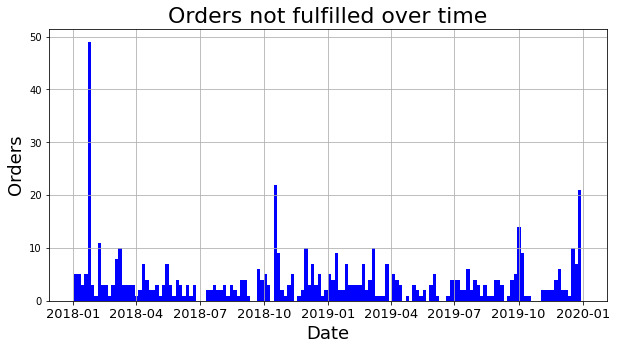

In [3]:
#Deffining the Shortage variable
Shortages = PurchasedOrders[PurchasedOrders['AmountPurchased']==0]

plt.figure(figsize=(10, 5))

plt.hist(Shortages.RequestDate, bins = 150, facecolor="b")
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.title('Orders not fulfilled over time', size=22)
plt.xlabel('Date', size=18)
plt.ylabel('Orders', size=18)
plt.xticks(size=13)

plt.grid(True)

plt.savefig("prueba.png", dpi=200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)


plt.show()

# Part 1

* Preview of the purchasing orders data.
* Merge the dictionary with the PurchasedOrders database to keep only the **patent** drugs, this was done because the file contains more drugs than only patent drugs.

In [4]:
# Preview of purchasing orders data.
PurchasedOrders.head(3)

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,MedDescription,Outflow,AmountRequested,AmountPurchased
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,BOLENTAX (ENOXAPARINA) 40 MG/0.4 ML JER PRELL C/2,15.0,5,6
1,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304883,BOLENTAX (ENOXAPARINA) 60 MG/0.6 ML JER PRELL C/2,14.0,2,2
2,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304284,FRESUBIN PLUS VAINILLA 236 ML. FÓRMULA ENTERAL,15.0,5,5


In [5]:
#Merge the dictionary with the PurchasedOrders database to keep only the patent drugs
PatentOrders = pd.merge(PurchasedOrders, PatentDrugs, on='MedCode').drop(columns='MedDescription_x').rename(columns={'MedDescription_y':'MedDescription'})
PatentOrders.head(3)

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,Outflow,AmountRequested,AmountPurchased,MedDescription,Compound,MedFamily,MedPriceMXN,MinStock,MaxStock
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,15.0,5,6,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),ENOXAPARINA SODICA,Sangre y órganos hematopoyéticos,694.0,7,18
1,52734,2018-01-04,258004.0,2018-01-04,2018-01-05,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,19.0,2,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),ENOXAPARINA SODICA,Sangre y órganos hematopoyéticos,694.0,7,18
2,52882,2018-01-15,258670.0,2018-01-15,2018-01-16,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,16.0,2,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),ENOXAPARINA SODICA,Sangre y órganos hematopoyéticos,694.0,7,18


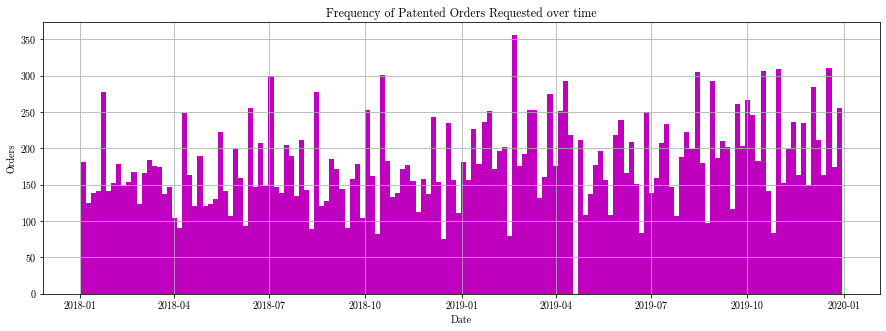

In [6]:
#Plot the frecuency of patent drugs requested over time

plt.figure(figsize=(15, 5))

plt.hist(PatentOrders.RequestDate, bins = 150, facecolor='m')

plt.title('Frequency of Patented Orders Requested over time')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.grid(True)
plt.show()

## Now that we have our data, lets see the shortages overall time. 

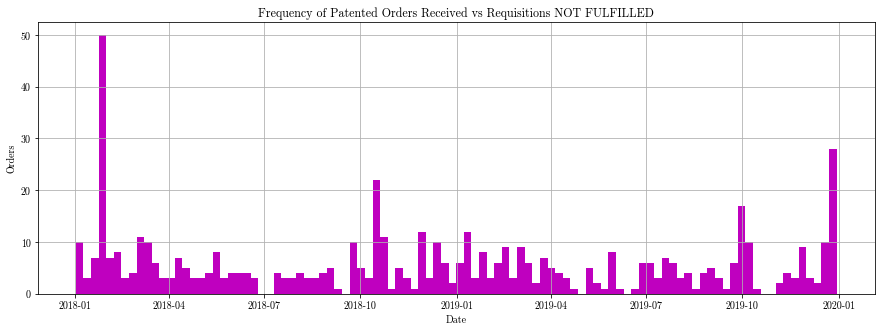

In [7]:
#Shortages over time
Shortages2 =PatentOrders[PatentOrders['AmountPurchased']==0]
plt.figure(figsize=(15, 5))
plt.hist(Shortages2.RequestDate, bins = 100, facecolor='m')
plt.title('Frequency of Patented Orders Received vs Requisitions NOT FULFILLED')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.grid(True)
plt.show()

## Let's see which are the 10 patent drugs with most shortages. 

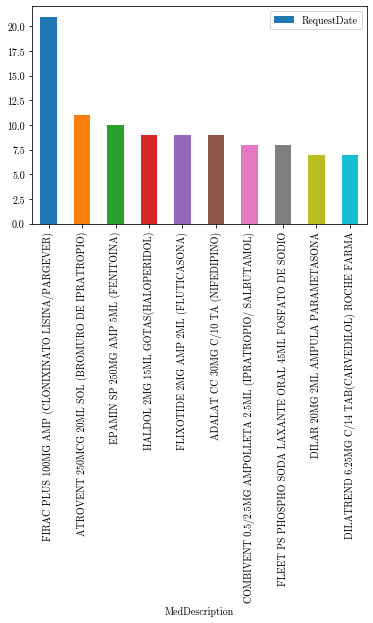

In [8]:
#Top 10 drugs with the most shortages
Shortages2.groupby('MedDescription').count().sort_values('RequestDate', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='RequestDate');

# Let's see which are the drugs with the most amount requested. 

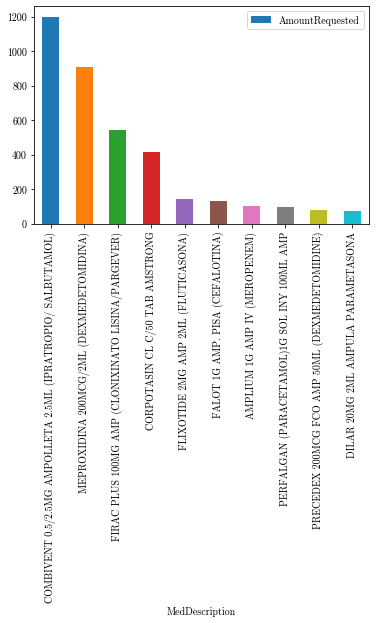

In [9]:
Shortages2.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='AmountRequested')

## Now, let's visualize the patent drug demand over time.

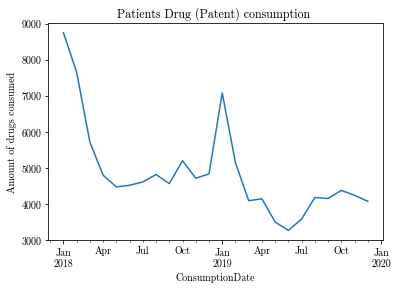

In [10]:
#Amount Consumed over time
PatientConsumption.groupby('ConsumptionDate').sum()['AmountConsumed'].plot()
plt.ylabel("Amount of drugs consumed")
plt.title("Patients Drug (Patent) consumption ");

## Let's see the 10 most requested drugs over time.

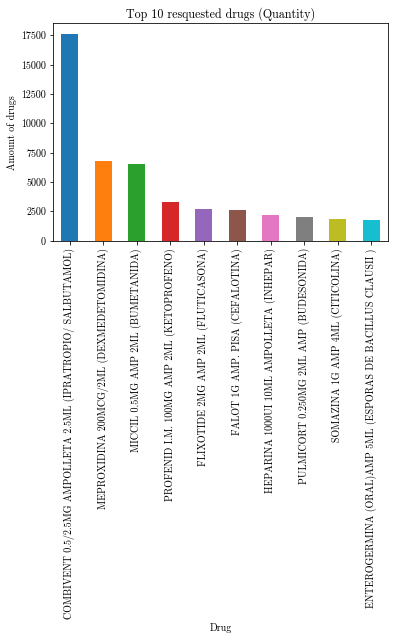

In [11]:
# 10 Most requested
PatentOrders.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10]['AmountRequested'].plot.bar()
plt.title("Top 10 resquested drugs (Quantity)")
plt.ylabel("Amount of drugs")
plt.xlabel("Drug");

## Let's see the 10 most demanded patent drugs.

In [12]:
# Top 10 Demanded
top10_c= PatientConsumption.groupby('MedDescription').sum().sort_values('AmountConsumed',ascending=False)[:10].reset_index()
top10_c

,MedDescription,ConsumptionNumber,MedCode,AmountConsumed,UnitaryCost,TotalCost
0,COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPI...,8.135285e+10,4.812319e+10,16997,443372.20,517482.09
1,MICCIL 0.5MG AMP 2ML (BUMETANIDA),2.879226e+10,1.663857e+10,7235,79875.48,116150.01
2,FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),1.566442e+10,9.169038e+09,2843,126029.59,129145.96
3,PULMICORT 0.250MG 2ML AMP (BUDESONIDA),1.245980e+10,7.805417e+09,2484,72048.02,75560.64
4,PROFENID IM (KETOPROFENO) 100MG/2ML AMP,1.339354e+10,7.507230e+09,2281,161678.22,162263.89
5,ENTEROGERMINA (ORAL)AMP 5ML (ESPORAS DE BACILL...,6.539944e+09,3.822669e+09,1949,15994.96,26997.81
6,SOMAZINA 1G AMP 4ML (CITICOLINA),1.027621e+10,5.929981e+09,1852,126801.89,130868.65
7,DICYNONE 250MG AMP 2ML (ETAMSILATO),7.821405e+09,4.528975e+09,1654,136554.01,165263.47
8,HEPARINA 1000UI 10ML AMPOLLETA (INHEPAR),7.741466e+09,4.487607e+09,1605,73787.49,86787.09
9,FOSFOCIL IV 1G AMP (FOSFOMICINA),8.170725e+09,4.718552e+09,1513,180634.15,191124.91


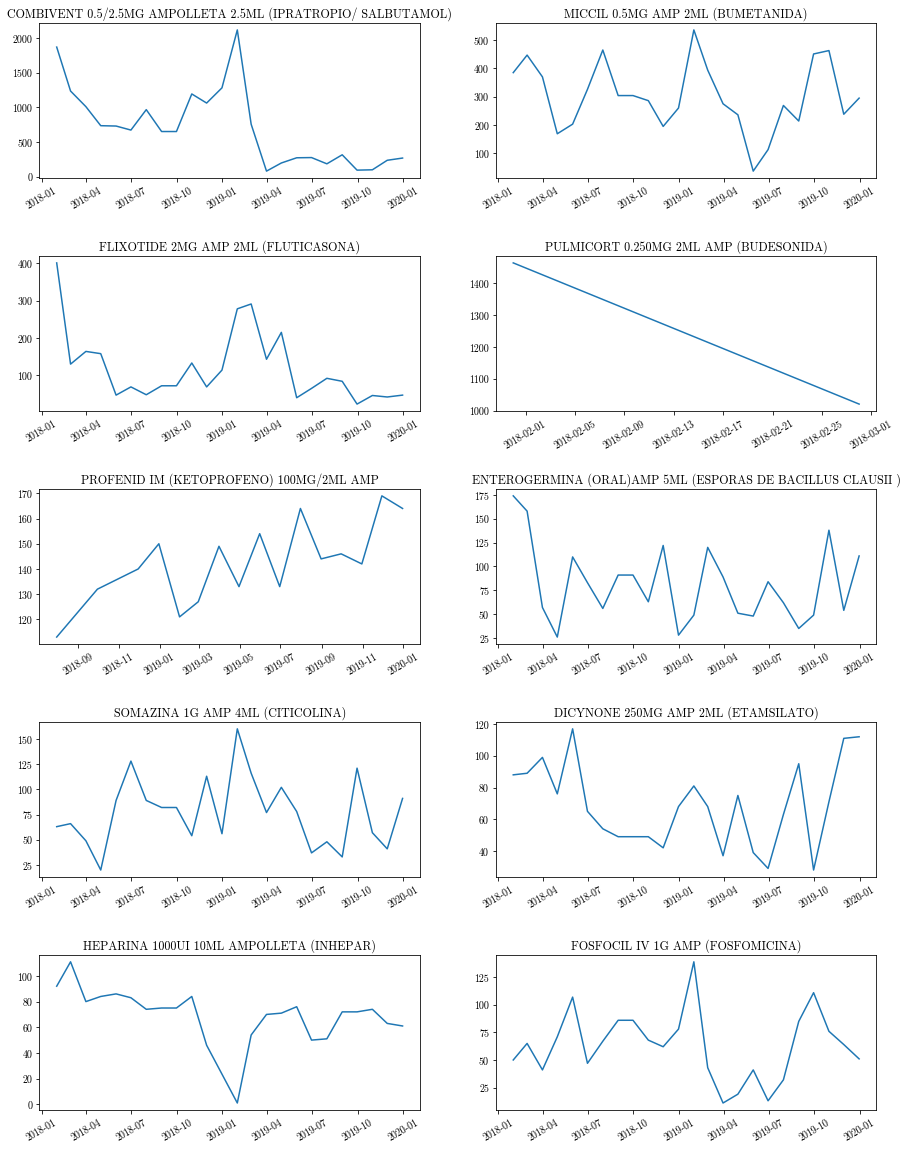

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))
fig.subplots_adjust(hspace=0.5)
for ax, med in zip(axes.flatten(), top10_c['MedDescription']):
    ax.plot(PatientConsumption[PatientConsumption['MedDescription']==med].groupby('ConsumptionDate').sum()['AmountConsumed'])
    ax.tick_params('x', labelrotation=30)
    ax.set(title=med)

_____________

### Harmonizing months

In [14]:
AmountCosummed=PatientConsumption.groupby(["ConsumptionDate","MedDescription"]).sum().reset_index()[["ConsumptionDate", "MedDescription", "AmountConsumed"]]

In [15]:
#End of month values
PatentOrders["MonthRequest"]=pd.to_datetime(PatentOrders['RequestDate'].map(lambda x: str(x.year) + "/" + str(x.month) + "/"+str(x.days_in_month)))
AmountRequested=PatentOrders.groupby(["MonthRequest", "MedDescription"]).sum().reset_index()[["MonthRequest", "MedDescription", "AmountRequested"]]

#### Top 10 Consumed MedCodes Time series

### Top 10 Consumed

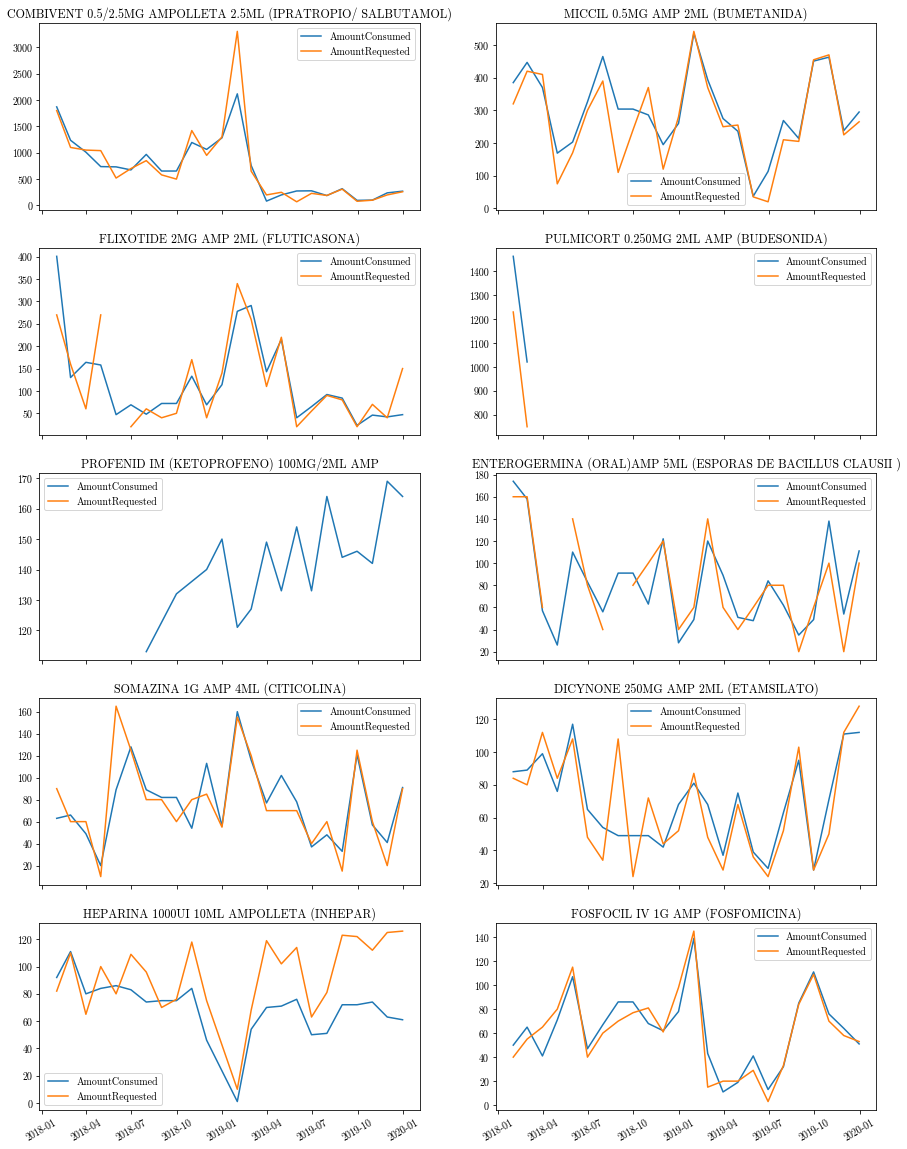

In [16]:
#Retrieve the top 10 most consumed Drugs
top10_c= PatientConsumption.groupby('MedDescription').sum().sort_values('AmountConsumed',ascending=False)[:10].reset_index()
Top10Consummed=list(top10_c.MedDescription)

#Merge Consumption with request amounts
master_c=pd.merge(AmountCosummed[AmountCosummed["MedDescription"].isin(Top10Consummed)], AmountRequested, left_on=["ConsumptionDate", "MedDescription"], right_on=["MonthRequest", "MedDescription"], how="left")
master_c=master_c.set_index("ConsumptionDate")


#Visualize time series
fig, axes = plt.subplots(5, 2, figsize=(15,20), sharex=True)
#fig.subplots_adjust(hspace=0.5)
for ax, med in zip(axes.flatten(), Top10Consummed):
    ax.plot(master_c[master_c["MedDescription"]==med]["AmountConsumed"])
    ax.plot(master_c[master_c["MedDescription"]==med]["AmountRequested"])
    ax.legend(["AmountConsumed","AmountRequested"])
    ax.tick_params('x', labelrotation=30)
    ax.set(title=med)

### We can see that not all the top 10 consumed drugs have continuous data. So we are going to narrow our analysis.

___

<h1><center>Continuous Time Series Analysis</center></h1>

------------

1.	Take only the time series of the drugs that were continuosly consumed over the 24 months.

In [17]:
ConsumedCompounds=pd.merge(PatientConsumption,PatentDrugs, on="MedCode").drop(columns="MedDescription_y").rename(columns={"MedDescription_x":"MedDescription"})
TotalMonths=ConsumedCompounds.groupby(["ConsumptionDate", "MedDescription"]).count().reset_index().groupby("MedDescription").count().sort_values("ConsumptionDate", ascending=False)
CompleteMonthsMedCodes=list(TotalMonths[TotalMonths["ConsumptionDate"]== 24].index)
df_24months= ConsumedCompounds[ConsumedCompounds["MedDescription"].isin(CompleteMonthsMedCodes)]

2.	Check the total Cost of those drugs.

In [18]:
print(df_24months["TotalCost"].sum() /19.66, "USD")
print(df_24months["TotalCost"].sum(), "MXN")

226658.69074262457 USD
4456109.859999999 MXN


In [19]:
print(df_24months.groupby(["MedCode","MedDescription"]).sum().sort_values("TotalCost", ascending= False)[0:20]["TotalCost"].sum(),"Total cost in MXN of the top 20 MedCodes")
top20 = df_24months.groupby(["MedDescription"]).sum().sort_values("TotalCost", ascending= False).index[:20]

3726996.6799999787 Total cost in MXN of the top 20 MedCodes


In [20]:
print("The total cost of these top 20 MedCodes represents the", df_24months.groupby("MedDescription").sum().sort_values("TotalCost", ascending= False).head(20)["TotalCost"].sum()/df_24months["TotalCost"].sum()*100, "percent of the total cost for patent drugs that where consumed for all months during 2018-2019")
print("The total cost of these top 20 MedCodes represents the", df_24months.groupby("MedDescription").sum().sort_values("TotalCost", ascending= False).head(20)["TotalCost"].sum()/ConsumedCompounds["TotalCost"].sum()*100, "percent of the total cost for patent drugs during 2018-2019")

The total cost of these top 20 MedCodes represents the 83.63789935825278 percent of the total cost for patent drugs that where consumed for all months during 2018-2019
The total cost of these top 20 MedCodes represents the 10.779568031989752 percent of the total cost for patent drugs during 2018-2019


3.	Check the number of shortages of those MedCodes

In [21]:
PurchasedCompounds=pd.merge(PurchasedOrders,PatentDrugs, on =["MedCode",'MedDescription']);
Top20Shortages=PurchasedCompounds[PurchasedCompounds["MedDescription"].isin(top20)]
TopS=list(Top20Shortages[Top20Shortages["AmountPurchased"]==0].groupby("MedDescription").sum().sort_values("AmountRequested", ascending=False).index)
TopS

['COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL)',
 'FIRAC PLUS 100MG AMP (CLONIXINATO LISINA/PARGEVER)',
 'FLIXOTIDE 2MG AMP 2ML (FLUTICASONA)',
 'SOMAZINA 1G AMP 4ML (CITICOLINA)',
 'INDAFLEX 2.5% CREMA 40G TUBO(INDOMETACINA)',
 'MYDOCALM A C/30 CAPS TOLPERISONA /PARACETAMOL',
 'VANCOCIN CP 1G AMP (VANCOMICINA)',
 'COMBIVENT RESPIMAT 1.68/8.77MG C/DOSIF.(IPRATRO./ SALBUTAMOL',
 'LIPITOR 80MG C/30 TAB(ATORVASTATINA)']

## After Filtering we got 9 MedCodes that have continuous data and presented at least one shortage. 

In [22]:
df_monetary10= ConsumedCompounds[ConsumedCompounds["MedDescription"].isin(TopS)]
print(df_monetary10.groupby("MedDescription").sum().sort_values("TotalCost", ascending= False)["TotalCost"].sum(),"Total cost in MXN of the top 9 MedCodes that have experienced at least 1 shortage")

print("The total cost of these top 9 MedCodes represents the", df_monetary10.groupby("MedDescription").sum().sort_values("TotalCost", ascending= False)["TotalCost"].sum()/df_24months["TotalCost"].sum()*100, "percent of the total cost for patent drugs that where consumed for all months during 2018-2019")
print("The total cost of these top 9 MedCodes represents the", df_monetary10.groupby("MedDescription").sum().sort_values("TotalCost", ascending= False)["TotalCost"].sum()/ConsumedCompounds["TotalCost"].sum()*100, "percent of the total cost for patent drugs during 2018-2019")

1794651.7999999756 Total cost in MXN of the top 9 MedCodes that have experienced at least 1 shortage
The total cost of these top 9 MedCodes represents the 40.27395769816088 percent of the total cost for patent drugs that where consumed for all months during 2018-2019
The total cost of these top 9 MedCodes represents the 5.190659620290489 percent of the total cost for patent drugs during 2018-2019


# We got that the total cost of those MedCode is 1.7 Million Pesos.

___

## Let's visualize the continuous data for the TOP 9 DRUGS.

In [23]:
#ALL THE QUANTITIES ARE GROUPED BY MONTH

# Consumed
MedConsumption = pd.merge(PatientConsumption, PatentDrugs[['MedCode','MedFamily','Compound']], on='MedCode', how='left')
# Requested, Purchased
MedOrders = pd.merge(PurchasedOrders, PatentDrugs[['MedCode','MedFamily','Compound']], on='MedCode', how='left')
MedOrders['YearMonth'] = pd.to_datetime(MedOrders['RequestDate'].dt.year*100+MedOrders['RequestDate'].dt.month, format='%Y%m')
# Incomplete
MedIncompleteOrders = pd.merge(IncompleteOrders[IncompleteOrders['RequestNumber']!=0], PatentDrugs[['MedCode','MedFamily','Compound']], on='MedCode', how='left')
MedIncompleteOrders['YearMonth'] = pd.to_datetime(MedIncompleteOrders['RequestDate'].dt.year*100+MedIncompleteOrders['RequestDate'].dt.month, format='%Y%m')

Compute `AmountRequested`, `AmountPurchased`, `AmountReceived` and `AmountMissing` per `[Month,RequestNumber,MedCode]`.

In [24]:
# 26763 requests
AmountRequested = MedOrders[['YearMonth','RequestNumber','MedCode','AmountRequested']].drop_duplicates()
# 26763 purchases
AmountPurchased = MedOrders.groupby(['YearMonth','RequestNumber','MedCode']).sum()['AmountPurchased'].reset_index()
# 1013 incomplete
AmountReceived = MedIncompleteOrders.groupby(['YearMonth','RequestNumber','MedCode']).sum()['AmountReceived'].reset_index()

# Merge columns to a total of 26763 rows
df = pd.merge(AmountRequested, AmountPurchased, on=['YearMonth','RequestNumber','MedCode'], how='left')
df = pd.merge(df, AmountReceived, on=['YearMonth','RequestNumber','MedCode'], how='left')
# if AmountReceived.isna() : order is complete
df['AmountReceived'] = df.apply(lambda x: x['AmountPurchased'] if pd.isna(x['AmountReceived']) else x['AmountReceived'], axis=1)
# compute shortage amount
df['AmountMissing'] = df['AmountRequested'] - df['AmountReceived']

In [25]:
AmountOrder = df.groupby(['YearMonth','MedCode']).sum().reset_index()

Compute `AmountConsumed` per `[Month,Compound]`.

In [26]:
# Consumed
AmountConsumed = MedConsumption.groupby(['ConsumptionDate','MedCode']).sum()['AmountConsumed'].reset_index()
AmountConsumed['YearMonth'] = pd.to_datetime(AmountConsumed['ConsumptionDate'].dt.year*100+AmountConsumed['ConsumptionDate'].dt.month, format='%Y%m')
AmountConsumed = AmountConsumed.loc[:, ['YearMonth','MedCode','AmountConsumed']]

Merge all amounts on `[Month,MedCode]`.

In [27]:
MonthlyCompounds = pd.merge(AmountOrder, AmountConsumed, on=['YearMonth','MedCode'], how='outer')
# fill AmountConsumed.isna() with zeros
#MonthlyCompounds['AmountConsumed'] = MonthlyCompounds['AmountConsumed'].fillna(0)
MonthlyCompounds = MonthlyCompounds.fillna(0)

In [28]:
MonthlyCompounds = pd.merge(MonthlyCompounds, PatentDrugs[['MedCode','MedDescription']], on='MedCode', how='left')

Plot time series

/home/jovyan/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jovyan/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


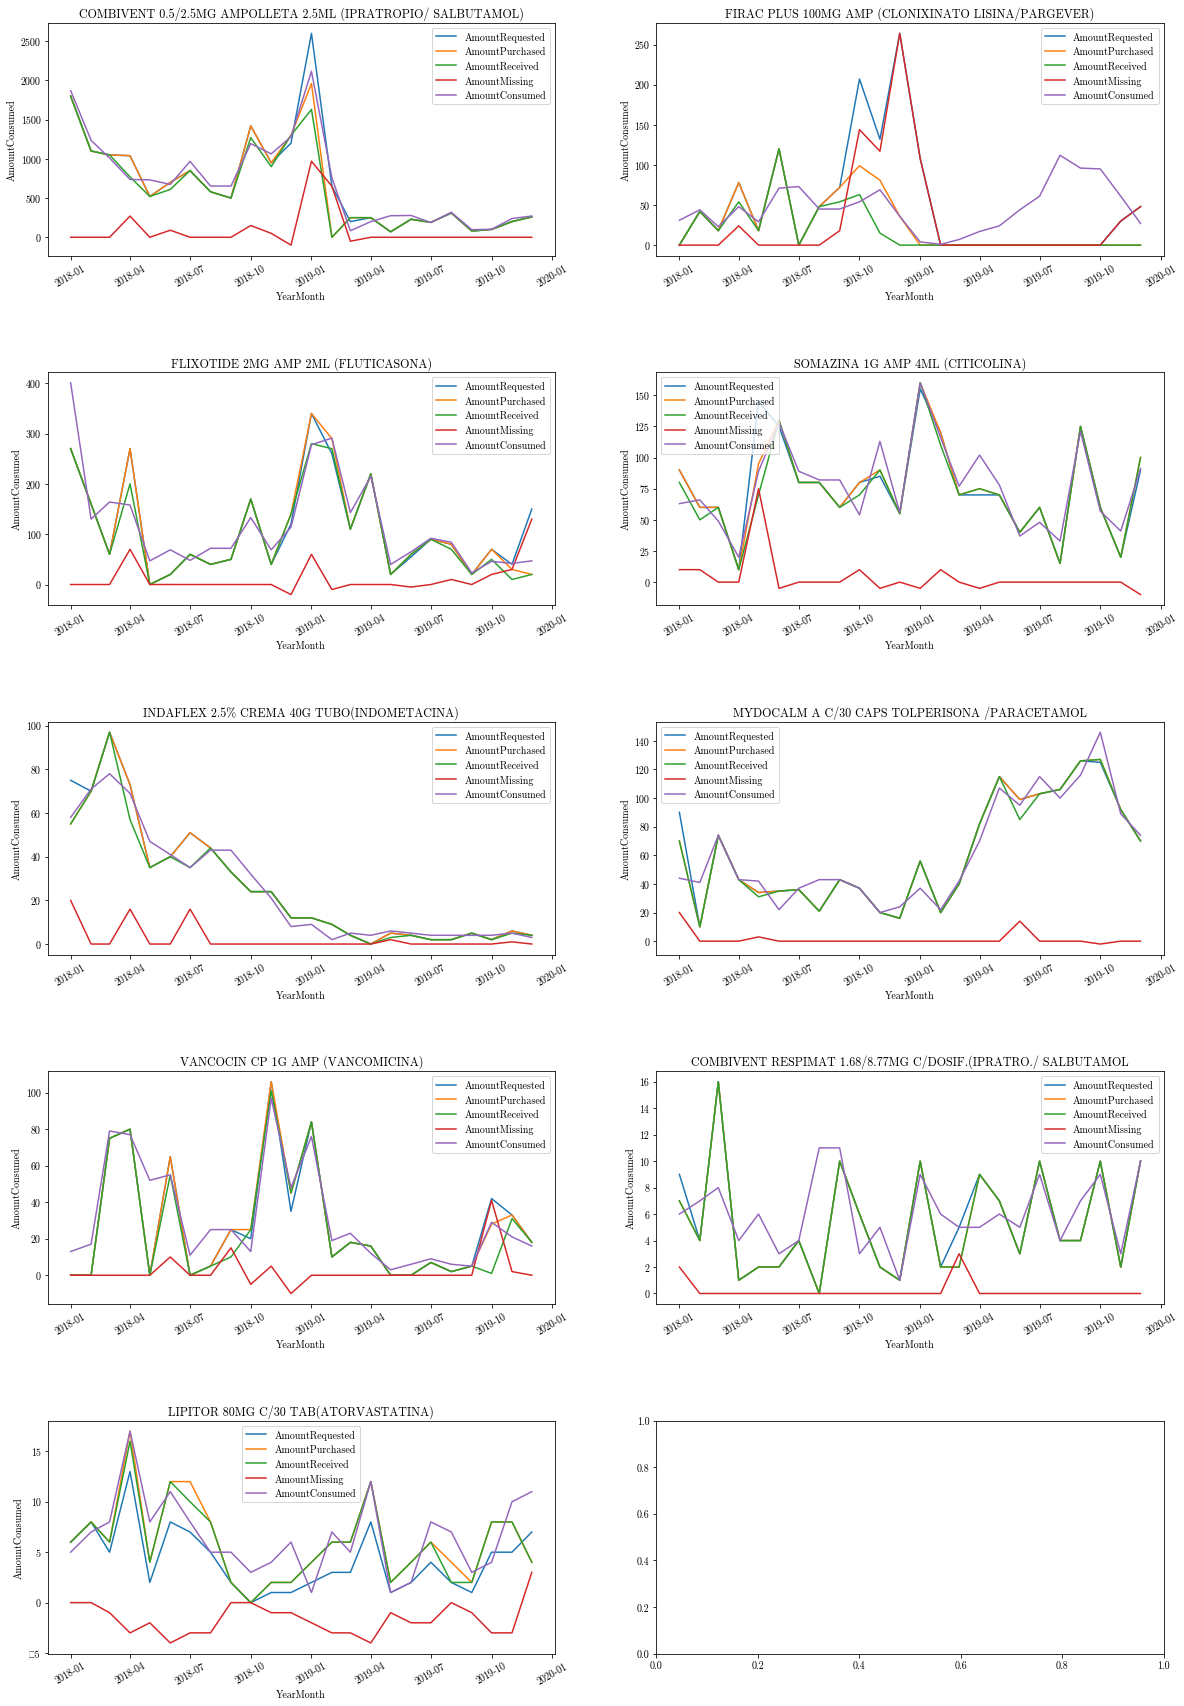

In [29]:
# Plot top compounds
fig, axes = plt.subplots(5, 2, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)
for ax, MedCode in zip(axes.flatten(), TopS):
    sns.lineplot(data=MonthlyCompounds[MonthlyCompounds["MedDescription"]==MedCode], x='YearMonth', y='AmountRequested', ax=ax)
    sns.lineplot(data=MonthlyCompounds[MonthlyCompounds["MedDescription"]==MedCode], x='YearMonth', y='AmountPurchased', ax=ax)
    sns.lineplot(data=MonthlyCompounds[MonthlyCompounds["MedDescription"]==MedCode], x='YearMonth', y='AmountReceived', ax=ax)
    sns.lineplot(data=MonthlyCompounds[MonthlyCompounds["MedDescription"]==MedCode], x='YearMonth', y='AmountMissing', ax=ax)
    sns.lineplot(data=MonthlyCompounds[MonthlyCompounds["MedDescription"]==MedCode], x='YearMonth', y='AmountConsumed', ax=ax)
    ax.legend(["AmountRequested","AmountPurchased",'AmountReceived','AmountMissing','AmountConsumed'])
    #ax.legend(["AmountRequested","AmountPurchased",'AmountMissing','AmountConsumed'])
    ax.tick_params('x', labelrotation=30)
    ax.set(title=MedCode);

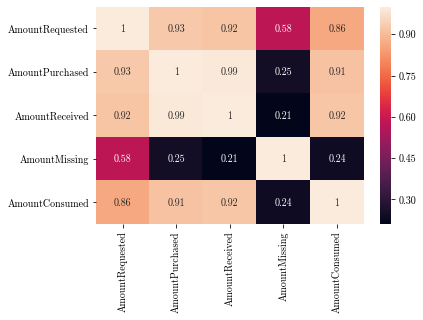

In [30]:
#Correlation metric among the time series.
plt.figure(figsize=(6,4))
sns.heatmap(data=MonthlyCompounds[['AmountRequested','AmountPurchased','AmountReceived','AmountMissing','AmountConsumed']].corr(), annot=True);

___